In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from cv_charge_discharge import Ec

<AxesSubplot:xlabel='Cycle', ylabel='Capacity (mAh/cm$^3$)'>

<Figure size 432x288 with 0 Axes>

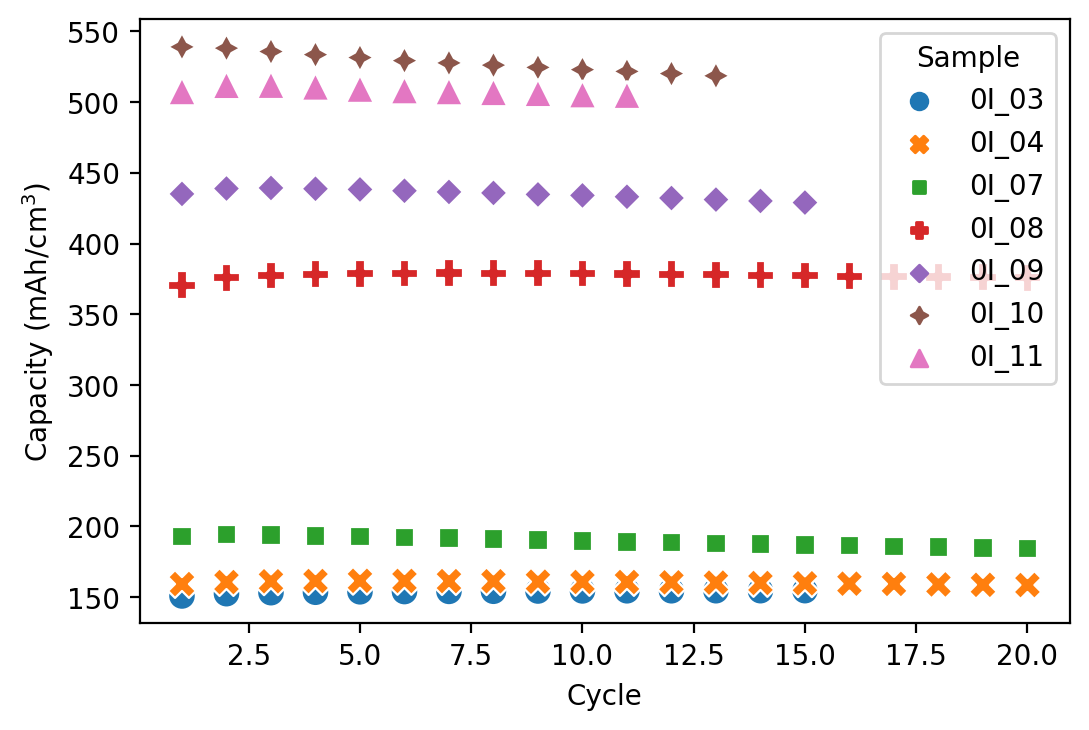

In [8]:

paths = {'0I_03' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03',
         '0I_04' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04', 
         '0I_07' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07',
         '0I_08' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
         '0I_09' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
         '0I_10' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
         '0I_11' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11'}

lsb_09 = pd.DataFrame()
for i in paths.keys():
    capacity = Ec.Electrochem(paths[i], 80)
    capacity['Sample'] = i
    lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
    plt.ioff()
fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 100)

<Figure size 432x288 with 0 Axes>

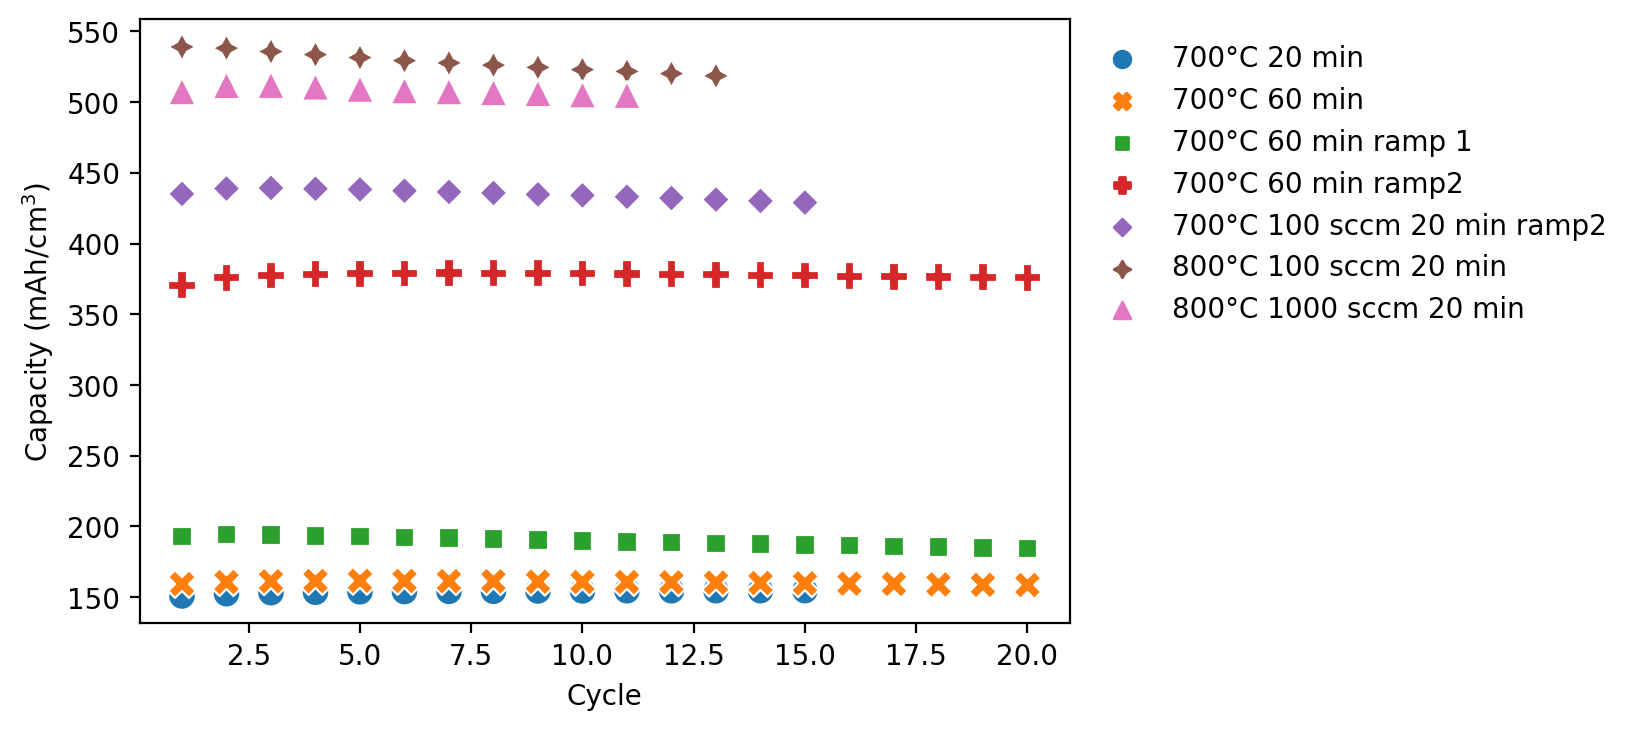

In [14]:

paths = {'700°C 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03',
         '700°C 60 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04', 
         '700°C 60 min ramp 1' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07',
         '700°C 60 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
         '700°C 100 sccm 20 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
         '800°C 100 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
         '800°C 1000 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11'}

lsb_09 = pd.DataFrame()
for i in paths.keys():
    capacity = Ec.Electrochem(paths[i], 80)
    capacity['Sample'] = i
    lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
ax = sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon = False, title = None)